# Análise do tempo entre a marcação da consulta e a consulta em si

- Felipe Cunha

### Hipóteses e pontos a serem investigados: 
- Uma parte das consultas foi marcada para o mesmo dia e a taxa de comparecimento deve ser mais alta;
- Quanto maior a diferença de tempo entre a marcação da consulta e a consulta, maior a taxa de ausentes;
- Quanto maior a diferença de tempo, mais as pessoas recebem SMS para lembrar da consulta;
    - E nesse caso, o recebimento de SMS faz com que aumente a taxa de presença?
- Verificar também as outras variáveis em relação a faixas de intervalo de tempo

In [9]:
# Criando uma nova coluna com o intervalo de tempo entre a data da marcação da consulta e a data da consulta
df['time_delta'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days 

### Análise das consultas marcadas para o mesmo dia

In [10]:
# Verificando quantas consultas foram marcadas para o mesmo dia e criando um dataframe com essas consultas
consultas_mesmo_dia = df['time_delta'].value_counts()[0]
total_consultas = len(df['time_delta'])

df_dia0 = df[df['time_delta'] == 0]
df_dia0['Compareceu'].value_counts()

print(f'Total de consultas marcadas para o mesmo dia: {consultas_mesmo_dia}.')
print(f'Total de consultas: {total_consultas}.')
print('\nRelação das pessoas que compareceram à consulta (1 - Sim, 0 - Não):')
print(df_dia0['Compareceu'].value_counts())
print(f'\nFormato do novo DataFrame: Linhas: {df_dia0.shape[0]}, Colunas: {df_dia0.shape[1]}')

Total de consultas marcadas para o mesmo dia: 38587.
Total de consultas: 110573.

Relação das pessoas que compareceram à consulta (1 - Sim, 0 - Não):
1    36795
0     1792
Name: Compareceu, dtype: int64

Formato do novo DataFrame: Linhas: 38587, Colunas: 15


In [11]:
presenca_dia0 = df_dia0['Compareceu'].value_counts()[1] # Relação de pessoas que foram a consulta
ausencia_dia0 = df_dia0['Compareceu'].value_counts()[0] # Relação de pessoas que não foram a consulta

print(f'Percentual de consultas marcadas para o mesmo dia: {consultas_mesmo_dia/total_consultas*100:.2f}%.')
print(f'Percentual de presença nessas consultas: {presenca_dia0/len(df_dia0)*100:.2f}%.')

Percentual de consultas marcadas para o mesmo dia: 34.90%.
Percentual de presença nessas consultas: 95.36%.


In [12]:
df_dia0.groupby('Compareceu').mean() # Panorama geral dos dados para as consultas marcadas no mesmo dia

C:\Users\felip\AppData\Local\Temp\ipykernel_6664\2605397951.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dia0.groupby('Compareceu').mean() # Panorama geral dos dados para as consultas marcadas no mesmo dia


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_delta
Compareceu,,,,,,,,,,
0,1.482995e+14,5.709346e+06,28.415281,0.136719,0.131696,0.049107,0.031250,0.039621,0.0,0.0
1,1.518766e+14,5.713338e+06,34.751927,0.107216,0.177660,0.067400,0.040277,0.023427,0.0,0.0


##### Conclusões
- Concluí-se que nesse tipo de consulta a taxa de comparecimento é bem alta (> 95%);
- A média de idade para quem compareceu é de 35 anos, um pouco maior que a das pessoas que não compareceram (28 anos);
- Fatores como receber ou não o bolsa família, doenças pré-existentes não parecem influenciar na presença ou ausência nas consultas;

### Análise do restante dos dados, consultas com 1 ou mais dias de intervalo entre a marcação e a consulta

In [23]:
df_sem_dia0 = df[df['time_delta'] > 0] # criando o dataframe
df_sem_dia0.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,time_delta
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76.00000,REPÚBLICA,0,1,0,0,0,0,1,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23.00000,GOIABEIRAS,0,0,0,0,0,0,0,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39.00000,GOIABEIRAS,0,0,0,0,0,0,0,2
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19.00000,CONQUISTA,0,0,0,0,0,0,1,2
10,7.345362e+14,5630213,F,2016-04-27,2016-04-29,37.09195,NOVA PALESTINA,0,0,0,0,0,0,1,2


In [24]:
# Verificando quantas consultas foram marcadas com mais de um dia de intervalo e criando um dataframe com essas consultas
consultas_mais_1dia = len(df_sem_dia0)

print(f'Total de consultas marcadas com um ou mais de um dia de intervalo: {consultas_mais_1dia}.')
print(f'Total de consultas: {total_consultas}.')
print('\nRelação das pessoas que compareceram à consulta (1 - Sim, 0 - Não):')
print(df_sem_dia0['Compareceu'].value_counts())
print(f'\nFormato do novo DataFrame: Linhas: {df_sem_dia0.shape[0]}, Colunas: {df_sem_dia0.shape[1]}')

Total de consultas marcadas com um ou mais de um dia de intervalo: 71981.
Total de consultas: 110573.

Relação das pessoas que compareceram à consulta (1 - Sim, 0 - Não):
1    51454
0    20527
Name: Compareceu, dtype: int64

Formato do novo DataFrame: Linhas: 71981, Colunas: 15


In [25]:
presenca_sem_dia0 = df_sem_dia0['Compareceu'].value_counts()[1] # Relação de pessoas que foram a consulta

print(f'Percentual de consultas marcadas para um intervalo de tempo maior que um dia: {consultas_mais_1dia/total_consultas*100:.2f}%.')
print(f'Percentual de presença nessas consultas: {presenca_sem_dia0/len(df_sem_dia0)*100:.2f}%.')

Percentual de consultas marcadas para o mesmo dia: 65.10%.
Percentual de presença nessas consultas: 71.48%.


##### Percebe-se uma queda em mais de 20% para consultas agendadas para dias posteriores. 
---
##### Em seguida foi verificado o comportamento da variável relativa ao intervalo de tempo

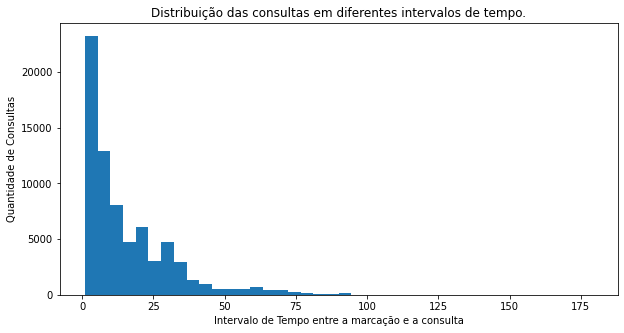

In [41]:
plt.figure(figsize=(10,5))
plt.hist(df_sem_dia0['time_delta'], bins=40) # histograma para ver a distribuição dos dados
plt.xlabel('Intervalo de Tempo entre a marcação e a consulta')
plt.ylabel('Quantidade de Consultas')
plt.title('Distribuição das consultas em diferentes intervalos de tempo.')
plt.show()

- A partir do histograma, percebeu-se que a maioria das consultas estava concentrada em um intervalo de tempo de até 40 dias. 
- Em seguida foi verificado se haviam outliers para essa série de dados

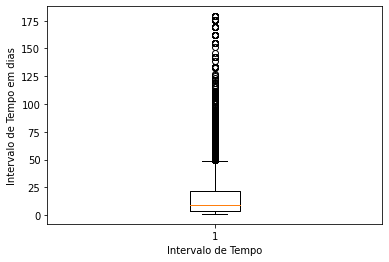

In [47]:
plt.boxplot(df_sem_dia0['time_delta']) # boxplot para verificar a presença de outliers
plt.xlabel('Intervalo de Tempo')
plt.ylabel('Intervalo de Tempo em dias')
plt.show()

In [33]:
q_high = df_sem_dia0['time_delta'].quantile(0.95) # Cálculo do limite máximo para retirada dos outliers em 95% de confiança
q_high

48.0

- Optou-se por retirar as consultas marcadas no mesmo dia e as com mais de 48 dias de intervalo para se fazer um estudo

In [34]:
df_filtrado = df_sem_dia0[df_sem_dia0['time_delta'] < q_high] # criação do novo dataframe filtrado, sem outliers
df_filtrado.head() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,time_delta
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76.00000,REPÚBLICA,0,1,0,0,0,0,1,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23.00000,GOIABEIRAS,0,0,0,0,0,0,0,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39.00000,GOIABEIRAS,0,0,0,0,0,0,0,2
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19.00000,CONQUISTA,0,0,0,0,0,0,1,2
10,7.345362e+14,5630213,F,2016-04-27,2016-04-29,37.09195,NOVA PALESTINA,0,0,0,0,0,0,1,2


In [36]:
print(f'Formato do DF com outliers: Linhas: {df_sem_dia0.shape[0]}, Colunas: {df_sem_dia0.shape[1]}')
print(f'Formato do DF sem outliers: Linhas: {df_filtrado.shape[0]}, Colunas: {df_filtrado.shape[1]}')
print(f'Foram retiradas {df_sem_dia0.shape[0] - df_filtrado.shape[0]} consultas.')

Formato do DF com outliers: Linhas: 71981, Colunas: 15
Formato do DF sem outliers: Linhas: 68336, Colunas: 15
Foram retiradas 3645 consultas.


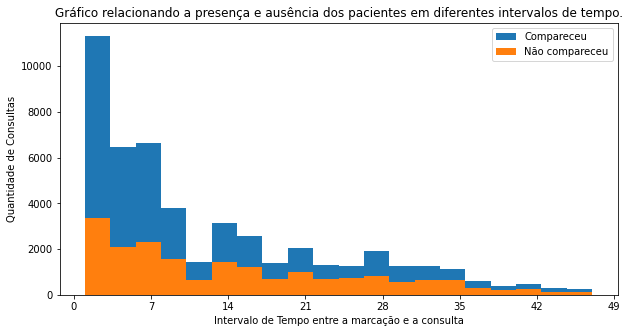

In [38]:
# cálculo do total de pessoas que compareceram e das que não compareceram 
compareceu = df_filtrado[df_filtrado['Compareceu'] == 1]['time_delta']
n_compareceu = df_filtrado[df_filtrado['Compareceu'] == 0]['time_delta']

plt.figure(figsize=(10,5))
plt.hist(compareceu, bins=20, label='Compareceu')
plt.hist(n_compareceu, bins=20, label='Não compareceu')
plt.xlabel('Intervalo de Tempo entre a marcação e a consulta')
plt.ylabel('Quantidade de Consultas')
plt.title('Gráfico relacionando a presença e ausência dos pacientes em diferentes intervalos de tempo.')
plt.xticks(np.arange(0, 50, 7))
plt.legend()
plt.show()

- Percebe-se que a partir de um intervalo de tempo ~14 dias, ocorre uma maior taxa de ausentes às consultas. 

In [75]:
df_filtrado.groupby('Compareceu').mean() # consultas com 1 ou mais dias de intervalo de tempo

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_delta
Compareceu,,,,,,,,,,
0,1.464457e+14,5.657389e+06,34.567194,0.116293,0.170914,0.065431,0.031351,0.016422,0.470940,14.467851
1,1.444385e+14,5.668006e+06,39.558777,0.086781,0.224569,0.079013,0.024000,0.019033,0.491291,12.362601


In [78]:
df_mais14 = df_filtrado[df_filtrado['time_delta'] >= 14] # consultas só com mais de 14 dias
df_mais14.groupby('Compareceu').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_delta
Compareceu,,,,,,,,,,
0,1.499885e+14,5.621023e+06,32.341602,0.115346,0.139067,0.048342,0.026757,0.013153,0.551209,24.955818
1,1.447641e+14,5.626526e+06,36.855872,0.087681,0.184681,0.057296,0.020735,0.015220,0.629205,24.685563


- Nesses conjuntos analisados, percebe-se que a média de idades dos faltantes é menor do que a de pessoas que compareceram às consultas (em torno de 10% menores).
---
- Por fim, analisou-se apenas os "outliers", ou seja, consultas com mais de 48 dias entre a marcação e a consulta em si

In [48]:
df_filtrado_2 = df_sem_dia0[df_sem_dia0['time_delta'] >= q_high] # criação do novo dataframe filtrado só dos outliers
df_filtrado_2.head() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Compareceu,time_delta
285,6.342844e+10,5430959,F,2016-03-04,2016-04-29,20.0,SANTA MARTHA,0,0,0,0,0,0,1,56
475,9.639166e+11,5452612,M,2016-03-10,2016-04-29,20.0,SÃO PEDRO,0,0,0,0,0,1,0,50
476,4.414826e+13,5408325,F,2016-02-29,2016-04-29,32.0,NOVA PALESTINA,0,0,0,0,0,1,0,60
696,6.441189e+14,5441632,F,2016-03-08,2016-04-29,69.0,JESUS DE NAZARETH,0,1,1,0,0,0,1,52
698,3.174757e+13,5435044,F,2016-03-07,2016-04-29,38.0,JESUS DE NAZARETH,0,0,0,1,0,1,0,53


In [50]:
print(f'Formato do DF com outliers: Linhas: {df_filtrado_2.shape[0]}, Colunas: {df_filtrado_2.shape[1]}')

Formato do DF com outliers: Linhas: 3645, Colunas: 15


In [51]:
df_filtrado_2.groupby('Compareceu').mean() # consultas com 1 ou mais dias de intervalo de tempo

C:\Users\felip\AppData\Local\Temp\ipykernel_6664\3285286524.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_filtrado_2.groupby('Compareceu').mean() # consultas com 1 ou mais dias de intervalo de tempo


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,time_delta
Compareceu,,,,,,,,,,
0,1.497573e+14,5.470031e+06,39.645890,0.066847,0.196929,0.064137,0.010840,0.015357,0.578139,65.416441
1,1.505914e+14,5.468331e+06,47.808511,0.036643,0.202916,0.067376,0.010638,0.016548,0.661939,66.139086


In [68]:
f2_comparecimento = len(df_filtrado_2[df_filtrado_2['Compareceu'] == 1])

print(f'Percebe-se uma taxa de comparecimento nessas consultas de: {(f2_comparecimento/len(df_filtrado_2)*100):.2f}%.')

Percebe-se uma taxa de comparecimento nessas consultas de: 69.63%.


- Por fim, concluí-se que: 
    - As pessoas vão mais às consultas marcadas para o mesmo dia (~95%);
    - Essa taxa possui uma **tendência de queda** com o __aumento do intervalo de tempo__ entre a marcação e a consulta;
    - Para consultas com mais de **14 dias**, há uma **contribuição maior** do recebimento de SMS como alerta;
    - Em geral, a média de idade das pessoas que comparecem às consultas é maior;
    - Há uma tendência de usuários do bolsa família faltarem mais às consultas; 
    - Fatores como deficiência não parecem influenciar no comparecimento ou não às consultas.